In [254]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [255]:
print(os.listdir('../input'))

['14-celebrity-faces-dataset', 'augment.ipynb', 'load.ipynb', 'main.ipynb', 'X.pickle', 'y.pickle']


In [256]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [257]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [258]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [259]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [260]:
DATADIR = "C:/Users/shadi/Desktop/term 7/hoosh/input/14-celebrity-faces-dataset/data/train"


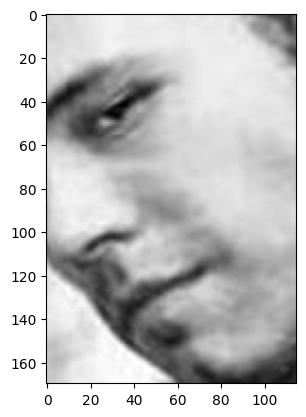

In [261]:
import cv2
for img in os.listdir("C:/Users/shadi/Desktop/term 7/hoosh/input/14-celebrity-faces-dataset/data/train/ben_afflek"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("C:/Users/shadi/Desktop/term 7/hoosh/input/14-celebrity-faces-dataset/data/train/ben_afflek",img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break

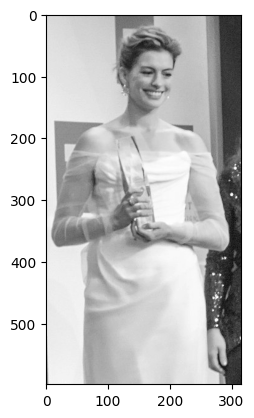

In [262]:
import cv2
from tqdm import tqdm


# CATEGORIES = [ "anne_hathaway","arnold_schwarzenegger", "ben_afflek", "dwayne_johnson","elton_john","jerry_seinfeld","kate_beckinsale","keanu_reeves"
# ,"lauren_cohan","madonna","mindy_kaling","simon_pegg","sofia_vergara","will_smith"]

CATEGORIES = [ "anne_hathaway","arnold_schwarzenegger", "ben_afflek", "dwayne_johnson","elton_john","jerry_seinfeld","kate_beckinsale","keanu_reeves"
,"lauren_cohan","madonna","mindy_kaling","simon_pegg"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [263]:
print(img_array)
print(img_array.shape)

[[218 219 218 ...  53  52  50]
 [218 219 218 ...  52  52  49]
 [218 219 219 ...  54  55  50]
 ...
 [128 126 139 ...  49  38  41]
 [131 127 138 ...  56  45  43]
 [131 125 133 ...  51  46  39]]
(599, 316)


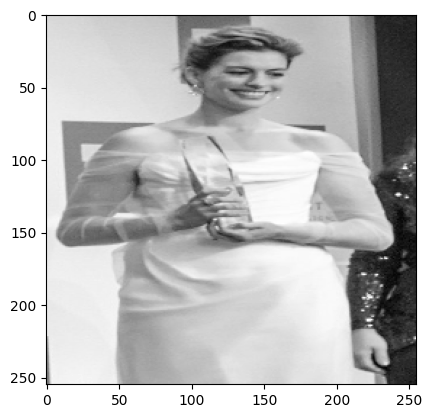

In [264]:
IMG_SIZE = 255

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [246]:
SEED = 2020
import random
def random_blockout(img, sl=0.1, sh=0.2, rl=0.4):
    p=random.random()
    if p>=0.25:
        w, h, c = IMG_SIZE, IMG_SIZE, 3
        origin_area = tf.cast(h*w, tf.float32)

        e_size_l = tf.cast(tf.round(tf.sqrt(origin_area * sl * rl)), tf.int32)
        e_size_h = tf.cast(tf.round(tf.sqrt(origin_area * sh / rl)), tf.int32)

        e_height_h = tf.minimum(e_size_h, h)
        e_width_h = tf.minimum(e_size_h, w)

        erase_height = tf.random.uniform(shape=[], minval=e_size_l, maxval=e_height_h, dtype=tf.int32)
        erase_width = tf.random.uniform(shape=[], minval=e_size_l, maxval=e_width_h, dtype=tf.int32)

        erase_area = tf.zeros(shape=[erase_height, erase_width, c])
        erase_area = tf.cast(erase_area, tf.uint8)

        pad_h = h - erase_height
        pad_top = tf.random.uniform(shape=[], minval=0, maxval=pad_h, dtype=tf.int32)
        pad_bottom = pad_h - pad_top

        pad_w = w - erase_width
        pad_left = tf.random.uniform(shape=[], minval=0, maxval=pad_w, dtype=tf.int32)
        pad_right = pad_w - pad_left

        erase_mask = tf.pad([erase_area], [[0,0],[pad_top, pad_bottom], [pad_left, pad_right], [0,0]], constant_values=1)
        erase_mask = tf.squeeze(erase_mask, axis=0)
        erased_img = tf.multiply(tf.cast(img,tf.float32), tf.cast(erase_mask, tf.float32))

        return tf.cast(erased_img, img.dtype)
    else:
        return tf.cast(img, img.dtype)


In [265]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        # path_aug=os.path.join(DATADIR_2,"output")
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                
                # img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array

                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                # print(new_array)
                
                # plt.imshow(new_array)
                # plt.show()
                training_data.append([new_array, class_num])  # add this to our training_data

                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
        # print(path_aug)
        
        # for img in tqdm(os.listdir(path_aug)):  # iterate over each image per dogs and cats
        #     try:
        #         print(img)
        #         # img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #         img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        #         print("####",img_array)
        #         new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                
                
        #         plt.imshow(new_array)
        #         plt.show()
        #         training_data.append([new_array, class_num])  # add this to our training_data

                
        #     except Exception as e:  # in the interest in keeping the output clean...
        #         pass
        # #     #except OSError as e:
        # #     #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        # #     #except Exception as e:
        # #     #    print("general exception", e, os.path.join(path,img))


create_training_data()

print(len(training_data))

100%|██████████| 119/119 [00:01<00:00, 117.98it/s]

1351


In [266]:
training_data[1]

[array([[[ 88, 122, 168],
         [ 93, 125, 172],
         [ 96, 126, 172],
         ...,
         [  3,   3,   3],
         [  5,   5,   5],
         [  3,   3,   3]],
 
        [[ 84, 118, 164],
         [ 82, 115, 161],
         [ 87, 117, 164],
         ...,
         [  5,   5,   5],
         [  5,   5,   5],
         [  4,   4,   4]],
 
        [[ 86, 122, 166],
         [ 83, 116, 161],
         [ 80, 111, 156],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [  3,   3,   3]],
 
        ...,
 
        [[ 13,  13,  13],
         [ 15,  15,  15],
         [ 13,  13,  13],
         ...,
         [ 11,  11,  11],
         [ 12,  12,  12],
         [ 11,  11,  11]],
 
        [[ 14,  14,  14],
         [ 15,  15,  15],
         [ 14,  14,  14],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [  9,   9,   9]],
 
        [[ 16,  16,  16],
         [ 16,  16,  16],
         [ 15,  15,  15],
         ...,
         [ 12,  12,  12],
  

In [175]:

# plt.imshow(np.array(training_data)[5][0], cmap='gray')
# plt.show()
# plt.imshow(data_aug, cmap='gray')
# plt.show()


In [267]:
import random

random.shuffle(training_data)

In [268]:
for sample in training_data[:10]:
    print(sample[1])

0
4
11
1
11
0
10
1
1
3


In [269]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)


[[[[215 216 221]
   [215 216 221]
   [215 216 221]
   ...
   [215 218 222]
   [216 218 222]
   [216 218 222]]

  [[215 216 221]
   [215 216 221]
   [215 216 221]
   ...
   [215 218 222]
   [216 218 222]
   [216 218 222]]

  [[215 216 221]
   [215 216 221]
   [215 216 221]
   ...
   [215 218 222]
   [216 218 222]
   [216 218 222]]

  ...

  [[208 213 221]
   [208 214 222]
   [208 213 222]
   ...
   [182 188 195]
   [181 186 192]
   [178 183 189]]

  [[208 214 222]
   [208 213 223]
   [208 212 224]
   ...
   [184 188 193]
   [180 185 192]
   [175 183 188]]

  [[208 214 221]
   [208 212 225]
   [208 214 224]
   ...
   [183 188 194]
   [179 185 191]
   [175 181 187]]]]


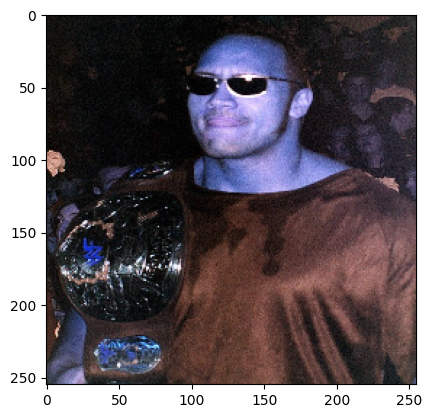

In [270]:
plt.imshow(X[10])
plt.show()

aug

In [198]:

train_datagen = ImageDataGenerator(rotation_range=45,  #Too much rotation may hurt accuracy, especially for small datasets. Try 15 and 45
width_shift_range=0.1,  #try 0.1, 0.3
height_shift_range=0.1, #try 0.1, 0.3
zoom_range = 0.1, #try 0.1, 0.3
vertical_flip=True,
horizontal_flip = True,
# fill_mode="reflect"
)


    #train_datagen.fit(X_train)
train_generator = train_datagen.flow(
    X,
    y,
    batch_size=1)  #images to generate in a batch
print("222")
# print(train_generator)
# plt.imshow( train_generator, cmap='gray')
# plt.show()
    

222


In [199]:
x = train_generator.next()
print(x[0].shape)  #Images
print(x[1].shape)  #Labels
print((x[0].shape[0]))

(1, 255, 255, 3)
(1,)
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(255, 255, 3)


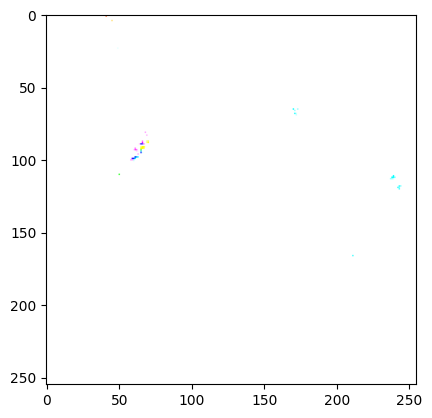

In [206]:
x = train_generator.next()
image = x[0][0]
# print(image)
print(image.shape)
# title = np.argmax(x[1][0])
# plt.figure(figsize=(1.5, 1.5))
# plt.suptitle(title, fontsize=12)
plt.imshow(image)
plt.show()

In [253]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [4]:
a =(i for i in range(100))
type(a)

generator